Unwanted Columns (only one unique value): []
Missing Values in Each Column:
 Heart Rate (bpm)                   0
SpO2 Level (%)                     0
Systolic Blood Pressure (mmHg)     0
Diastolic Blood Pressure (mmHg)    0
Body Temperature (°C)              0
Fall Detection                     0
Predicted Disease                  0
Data Accuracy (%)                  0
Heart Rate Alert                   0
SpO2 Level Alert                   0
Blood Pressure Alert               0
Temperature Alert                  0
dtype: int64
Features with only one value: []
Categorical Features: Index(['Fall Detection', 'Predicted Disease', 'Heart Rate Alert',
       'SpO2 Level Alert', 'Blood Pressure Alert', 'Temperature Alert'],
      dtype='object')
Distribution for Fall Detection:
Fall Detection
No     0.50234
Yes    0.49766
Name: proportion, dtype: float64
Distribution for Predicted Disease:
Predicted Disease
Asthma               0.20120
Diabetes Mellitus    0.20104
Normal               0.2002

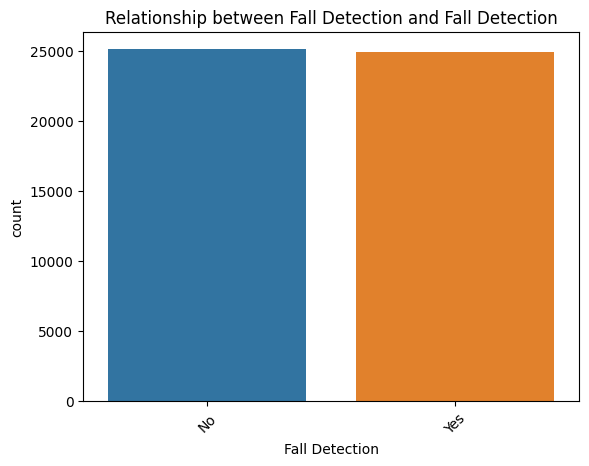

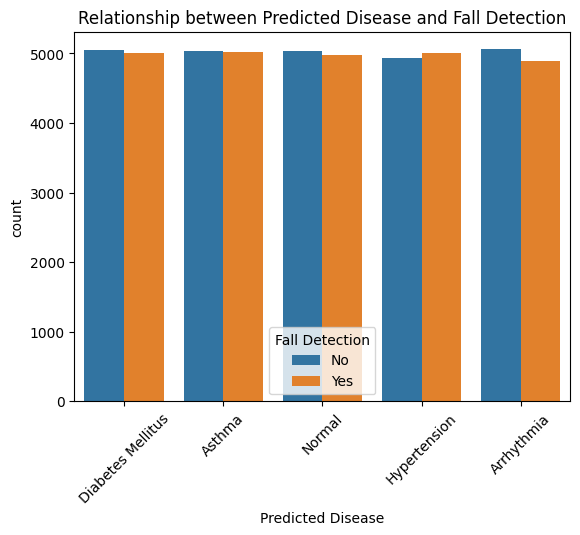

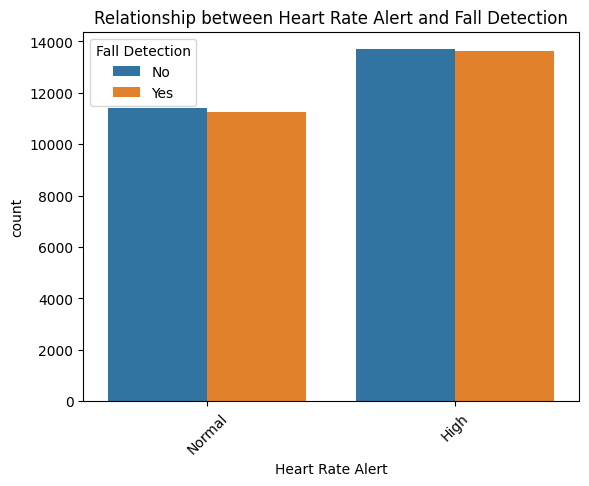

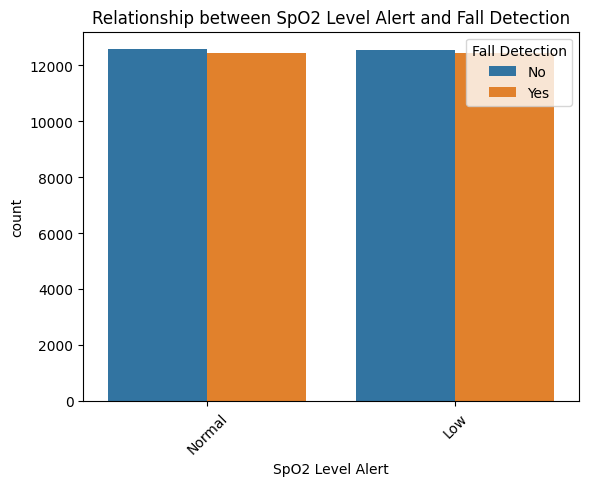

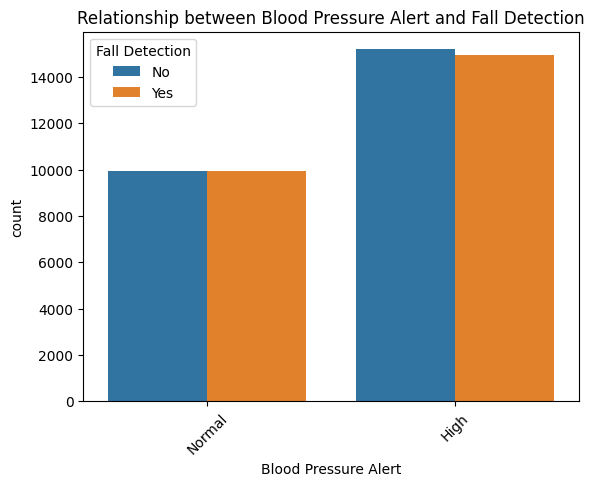

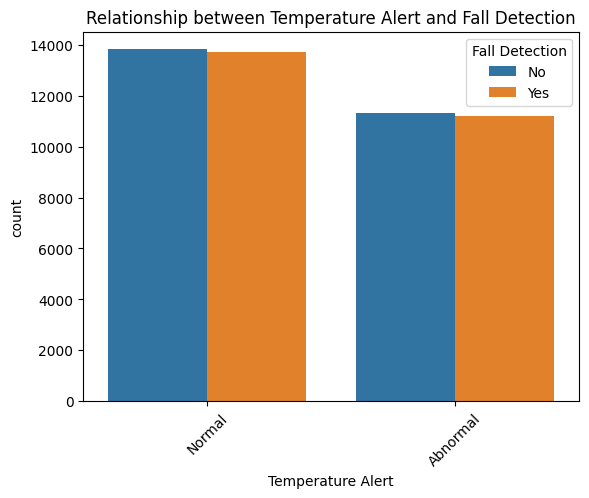

Numerical Features: Index(['Heart Rate (bpm)', 'SpO2 Level (%)', 'Systolic Blood Pressure (mmHg)',
       'Diastolic Blood Pressure (mmHg)', 'Body Temperature (°C)',
       'Data Accuracy (%)'],
      dtype='object')
Discrete Numerical Features: []
Continuous Numerical Features: ['Heart Rate (bpm)', 'Systolic Blood Pressure (mmHg)', 'Diastolic Blood Pressure (mmHg)', 'Body Temperature (°C)']


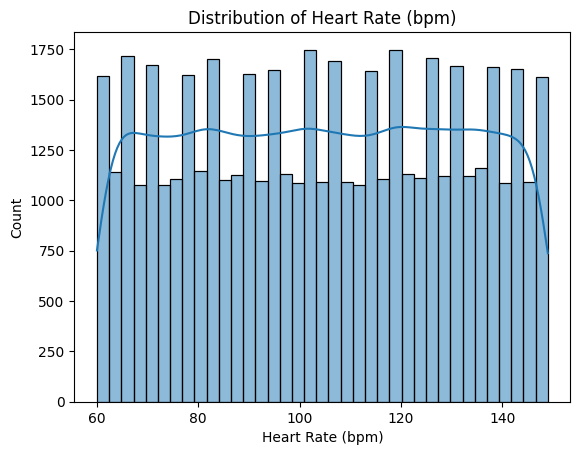

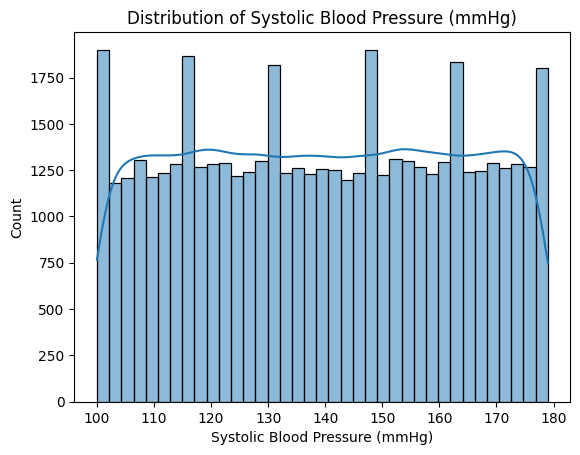

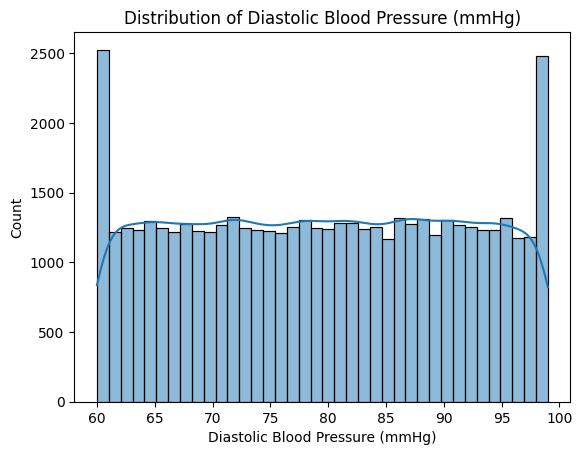

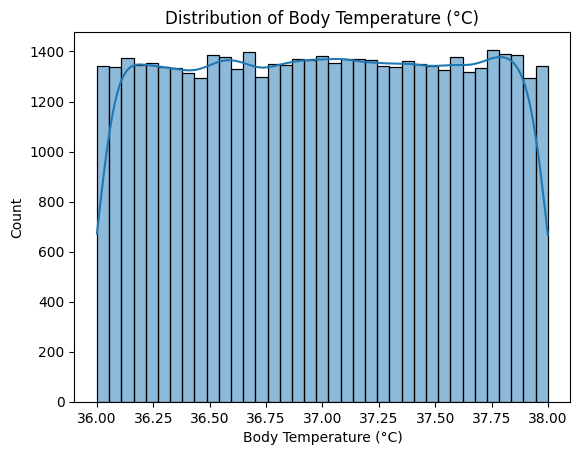

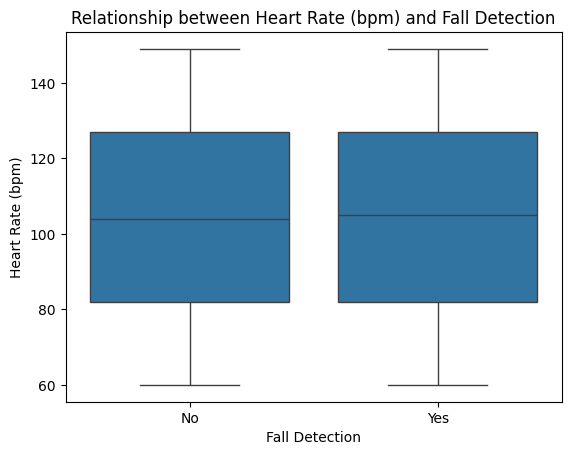

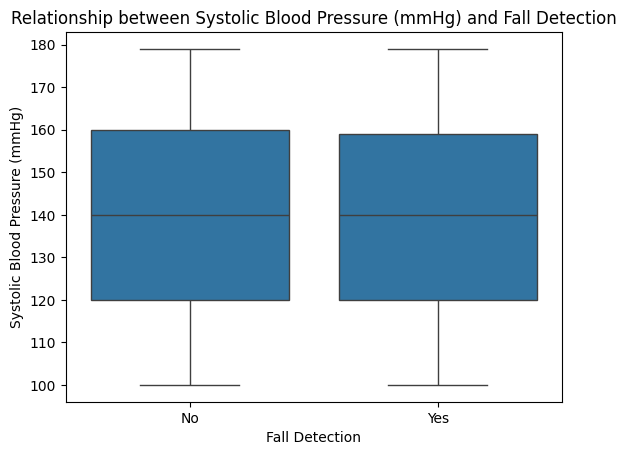

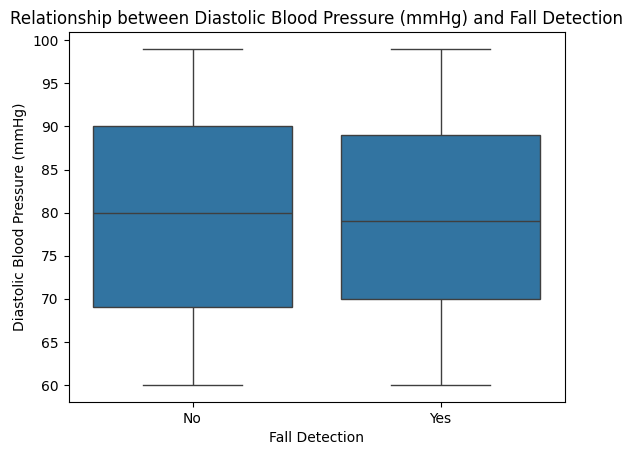

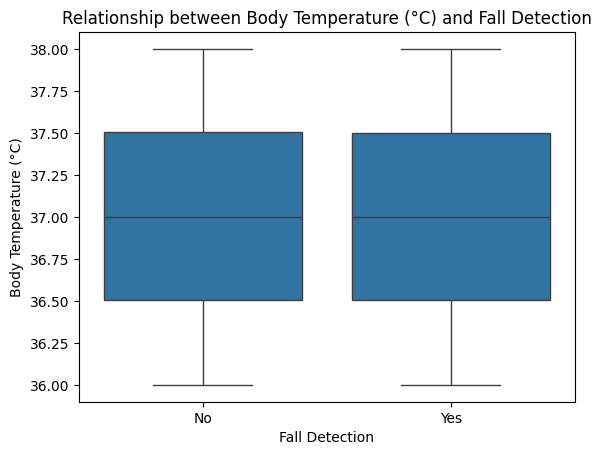

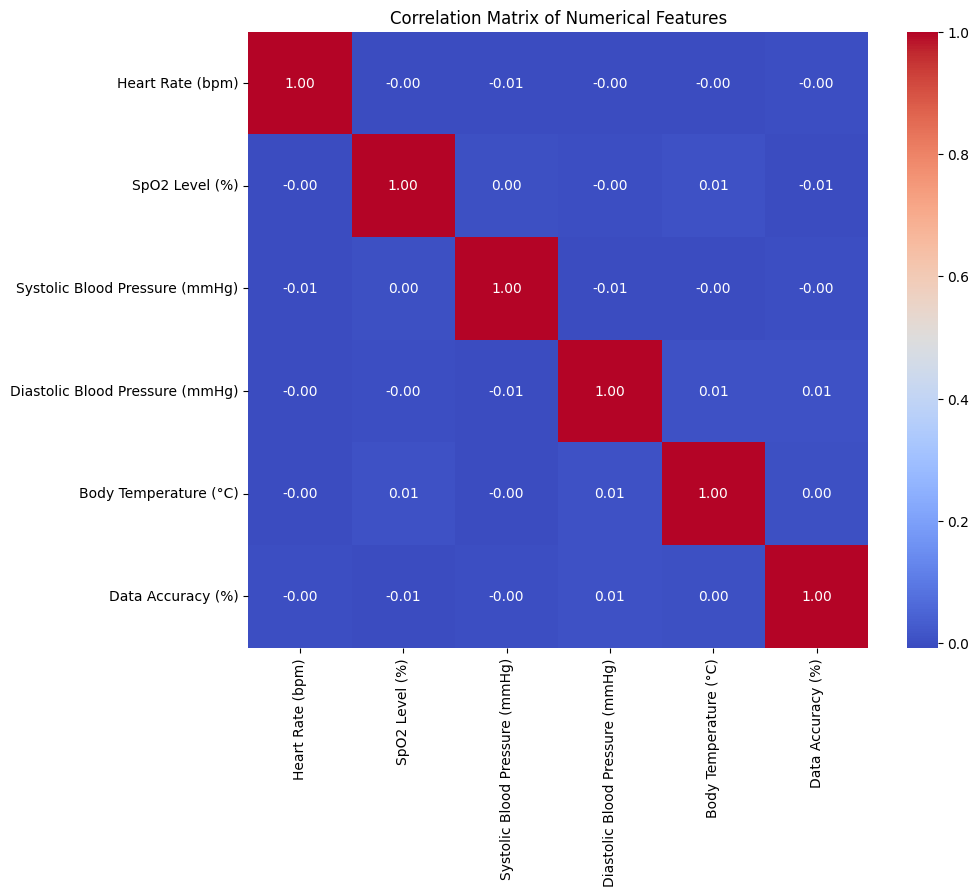

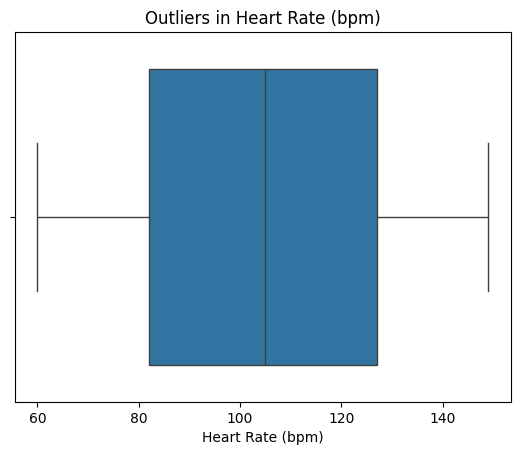

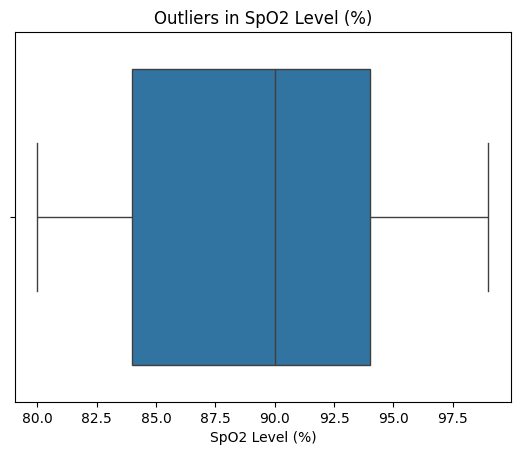

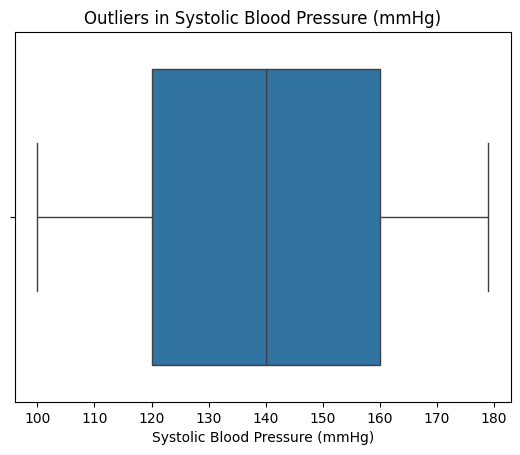

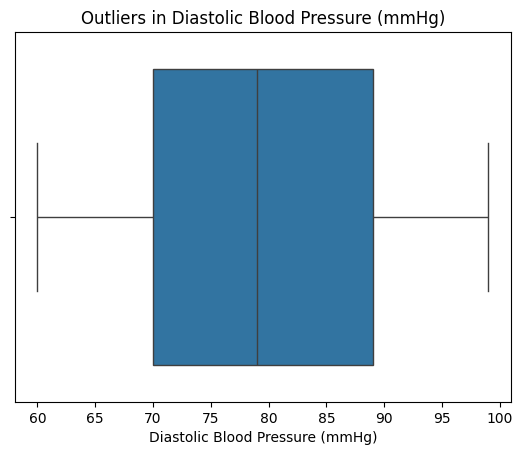

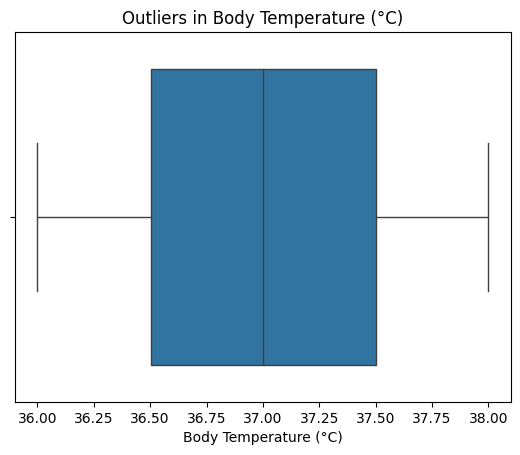

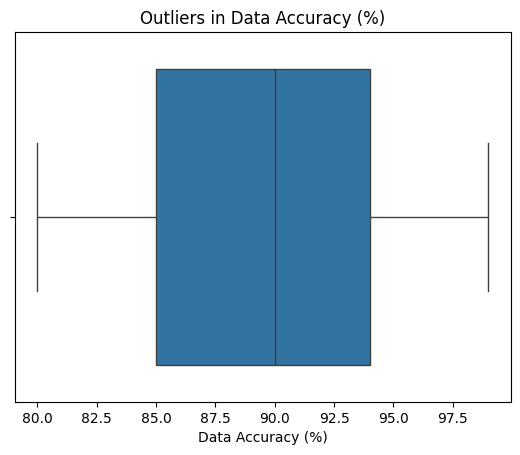

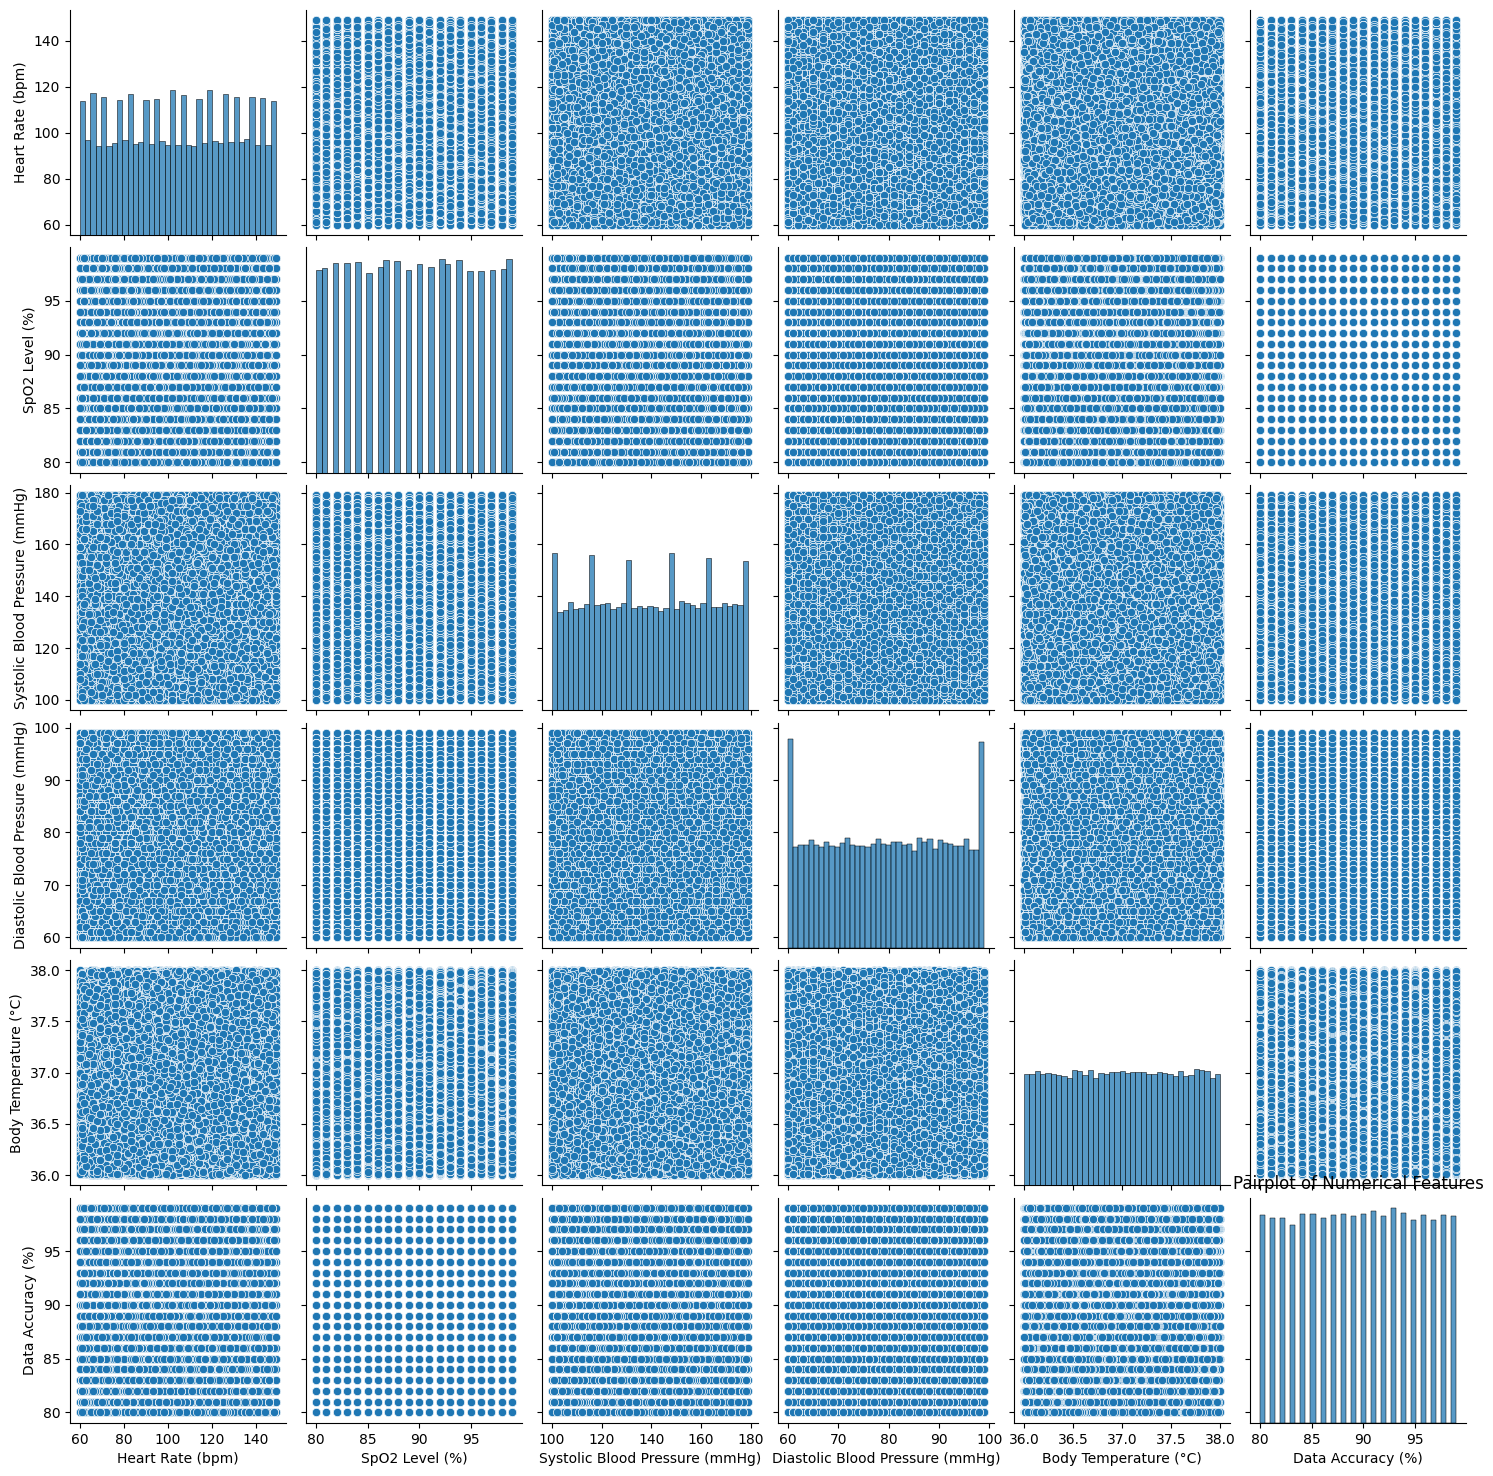

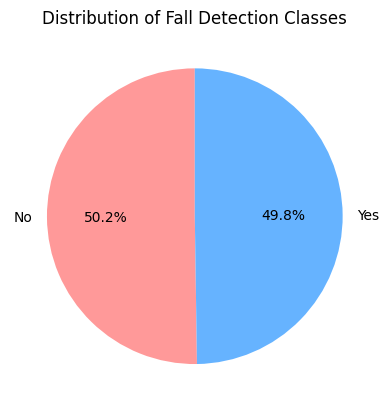

Class Counts for 'Fall Detection':
 Fall Detection
No     25117
Yes    24883
Name: count, dtype: int64


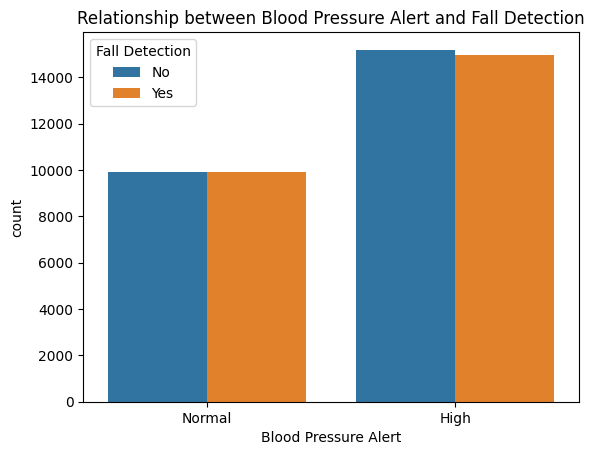

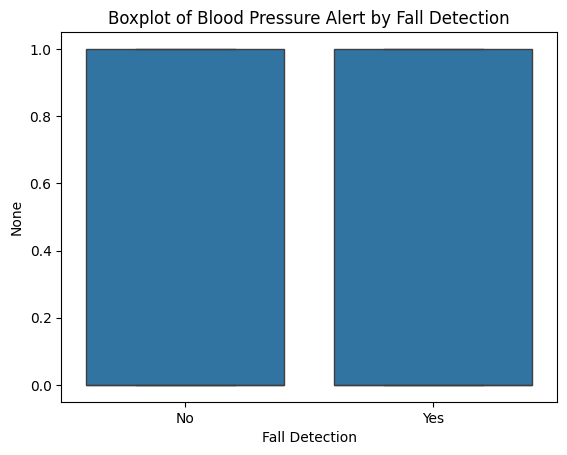

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
file_path = r"C:\Users\Asus\Desktop\CM1601 Viva\archive (2)\patients_data_with_alerts.xlsx"
df = pd.read_excel(file_path)

# Drop the 'Patient Number' column entirely
df = df.drop(columns=['Patient Number'], errors='ignore')

# Step 1.1: Identify Unwanted Columns
unwanted_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Unwanted Columns (only one unique value):", unwanted_columns)

# Step 1.2: Find Missing Values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Step 1.3: Find Features with One Value
single_value_features = [col for col in df.columns if df[col].nunique() == 1]
print("Features with only one value:", single_value_features)

# Step 1.4: Explore Categorical Features
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", categorical_features)

# Step 1.5: Categorical Feature Distribution
for cat_col in categorical_features:
    print(f"Distribution for {cat_col}:")
    print(df[cat_col].value_counts(normalize=True))

# Step 1.6: Relationship Between Categorical Features and Label (Assuming 'Fall Detection' is the label)
if 'Fall Detection' in df.columns:
    for cat_col in categorical_features:
        sns.countplot(x=cat_col, hue='Fall Detection', data=df)
        plt.title(f'Relationship between {cat_col} and Fall Detection')
        plt.xticks(rotation=45)
        plt.show()

# Step 1.7: Explore Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", numerical_features)

# Step 1.8: Find Discrete Numerical Features
discrete_features = [col for col in numerical_features if df[col].nunique() < 20]
print("Discrete Numerical Features:", discrete_features)

# Step 1.9: Relation Between Discrete Numerical Features and Labels
for feature in discrete_features:
    if 'Fall Detection' in df.columns:
        sns.countplot(x=feature, hue='Fall Detection', data=df)
        plt.title(f'Relationship between {feature} and Fall Detection')
        plt.show()

# Step 1.10: Find Continuous Numerical Features
continuous_features = [col for col in numerical_features if df[col].nunique() > 20]
print("Continuous Numerical Features:", continuous_features)

# Step 1.11: Distribution of Continuous Numerical Features
for feature in continuous_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Step 1.12: Relationship Between Continuous Numerical Features and Labels
for feature in continuous_features:
    if 'Fall Detection' in df.columns:
        sns.boxplot(x='Fall Detection', y=feature, data=df)
        plt.title(f'Relationship between {feature} and Fall Detection')
        plt.show()

# Step 1.13: Confusion Matrix to See How Each Feature Relates to Each Other
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 1.14: Find Outliers in Numerical Features
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

# Step 1.15: Explore the Correlation Between Numerical Features
sns.pairplot(df[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Step 1.16: Check if the Dataset is Balanced or Not (Assuming 'Fall Detection' is the label)
if 'Fall Detection' in df.columns:
    class_counts = df['Fall Detection'].value_counts()
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title('Distribution of Fall Detection Classes')
    plt.show()
    print("Class Counts for 'Fall Detection':\n", class_counts)

# Step 1.17: Relationship Between 'Blood Pressure Alert' and 'Fall Detection' (if present in the data)
if 'Blood Pressure Alert' in df.columns and 'Fall Detection' in df.columns:
    sns.countplot(x='Blood Pressure Alert', hue='Fall Detection', data=df)
    plt.title('Relationship between Blood Pressure Alert and Fall Detection')
    plt.show()

    sns.boxplot(x='Fall Detection', y=df['Blood Pressure Alert'].astype('category').cat.codes, data=df)
    plt.title('Boxplot of Blood Pressure Alert by Fall Detection')
    plt.show()

Unwanted Columns (only one unique value): []
Missing Values in Each Column:
 Heart Rate (bpm)                   0
SpO2 Level (%)                     0
Systolic Blood Pressure (mmHg)     0
Diastolic Blood Pressure (mmHg)    0
Body Temperature (°C)              0
Fall Detection                     0
Predicted Disease                  0
Data Accuracy (%)                  0
Heart Rate Alert                   0
SpO2 Level Alert                   0
Blood Pressure Alert               0
Temperature Alert                  0
dtype: int64
Features with only one value: []
Categorical Features: Index(['Fall Detection', 'Predicted Disease', 'Heart Rate Alert',
       'SpO2 Level Alert', 'Blood Pressure Alert', 'Temperature Alert'],
      dtype='object')
Distribution for Fall Detection:
Fall Detection
No     0.50234
Yes    0.49766
Name: proportion, dtype: float64
Distribution for Predicted Disease:
Predicted Disease
Asthma               0.20120
Diabetes Mellitus    0.20104
Normal               0.2002

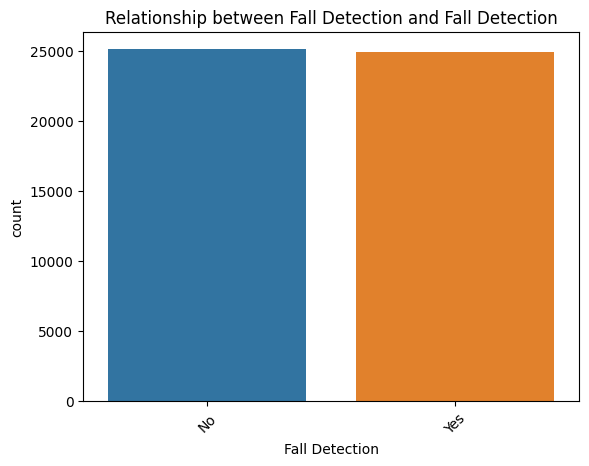

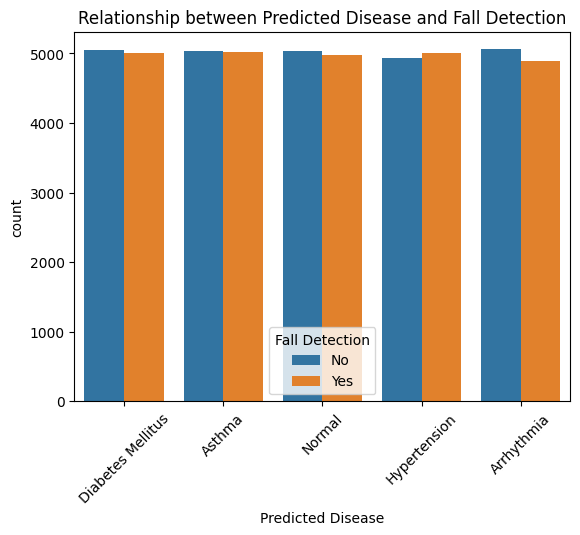

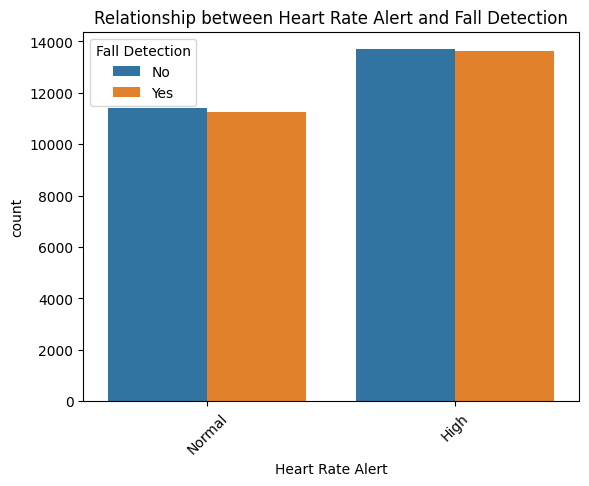

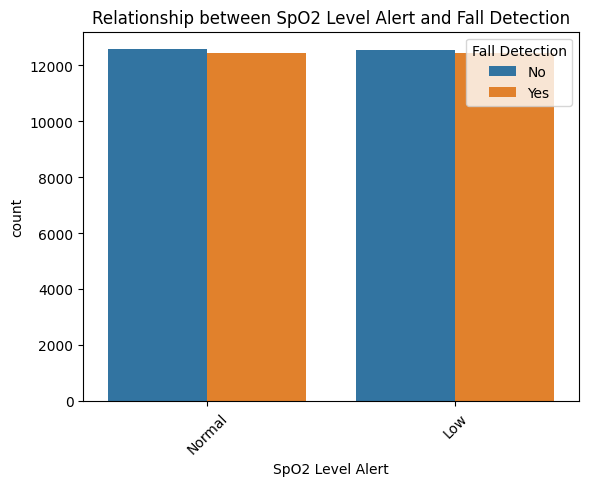

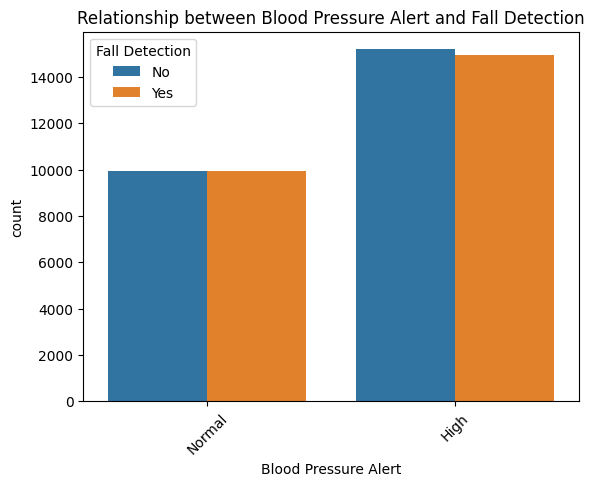

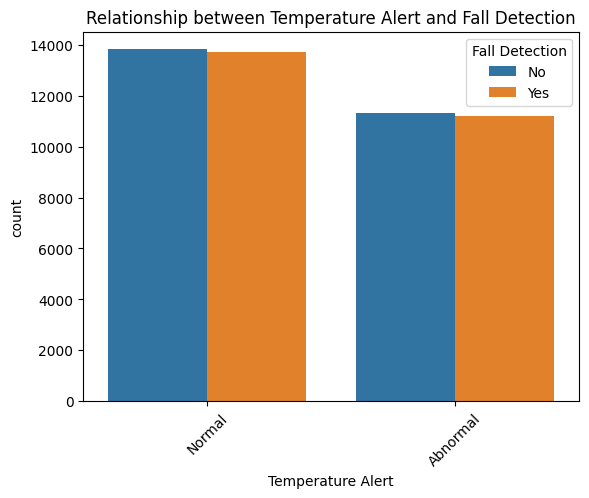

Numerical Features: Index(['Heart Rate (bpm)', 'SpO2 Level (%)', 'Systolic Blood Pressure (mmHg)',
       'Diastolic Blood Pressure (mmHg)', 'Data Accuracy (%)'],
      dtype='object')
Discrete Numerical Features: []
Continuous Numerical Features: ['Heart Rate (bpm)', 'Systolic Blood Pressure (mmHg)', 'Diastolic Blood Pressure (mmHg)']


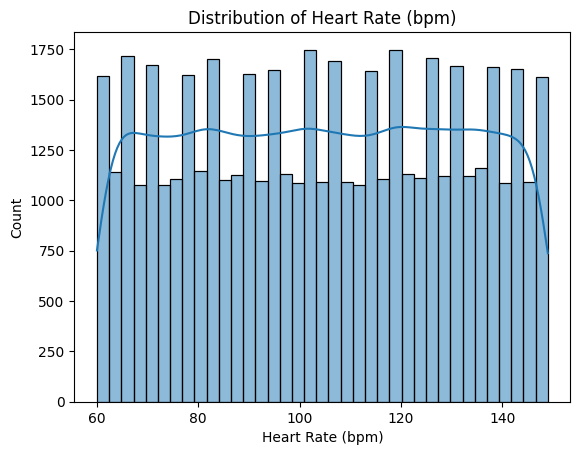

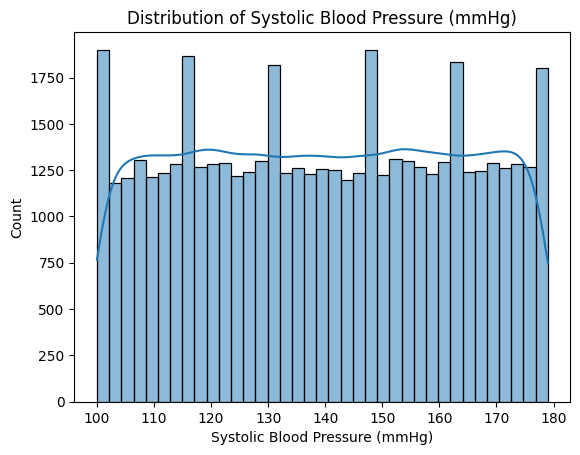

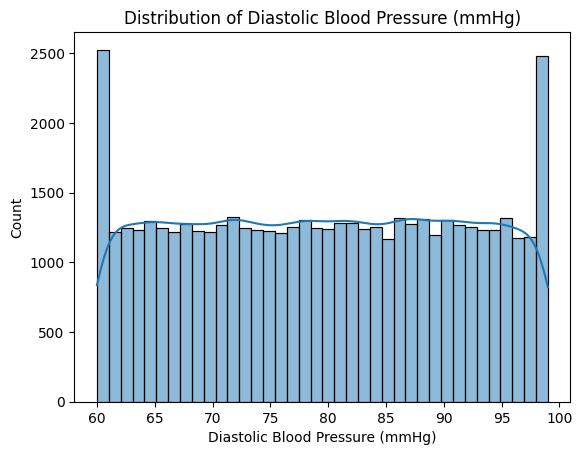

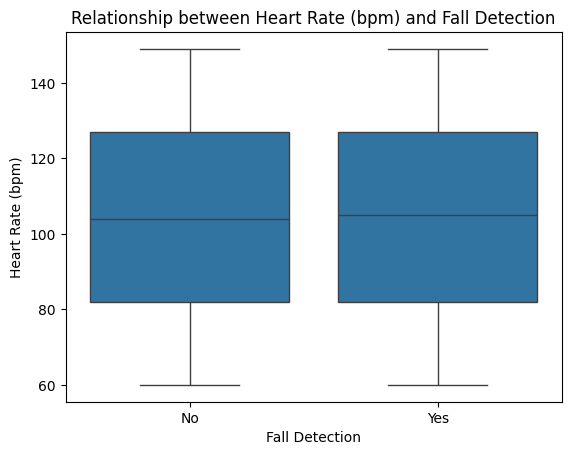

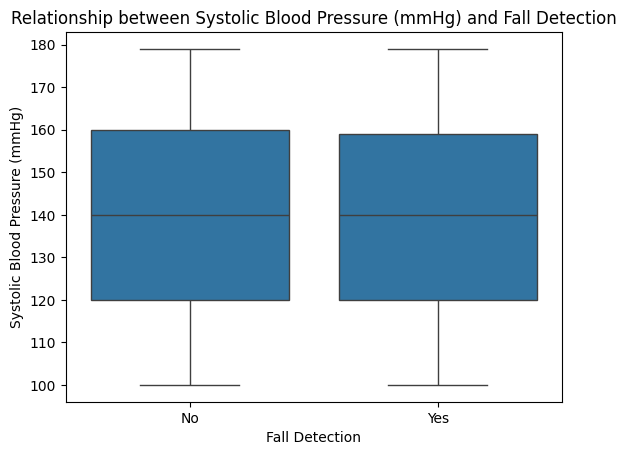

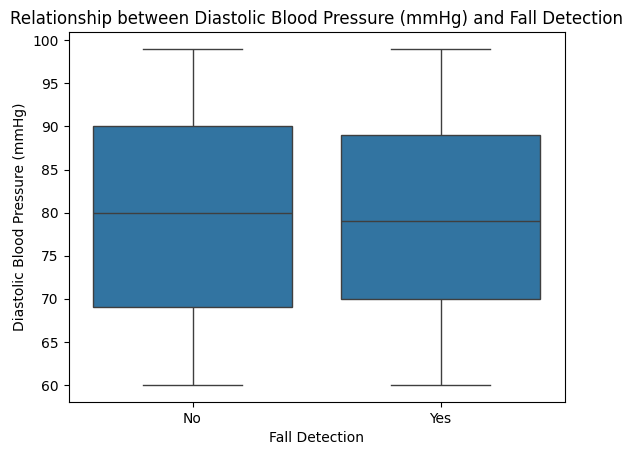

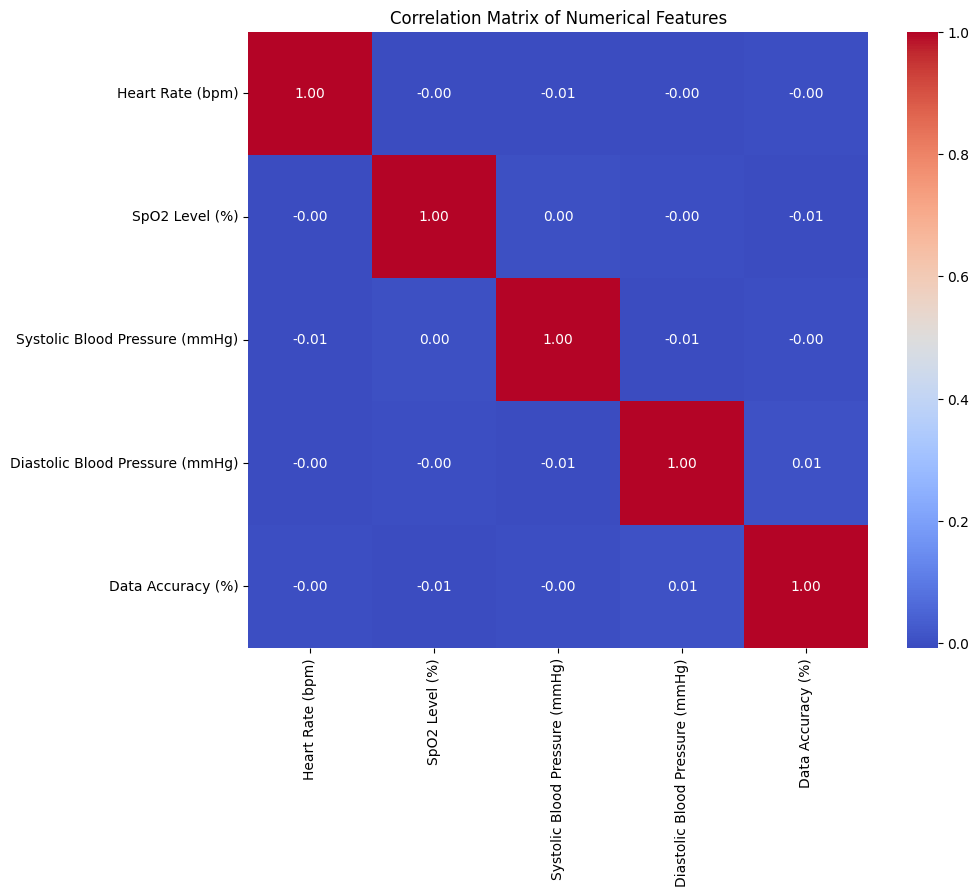

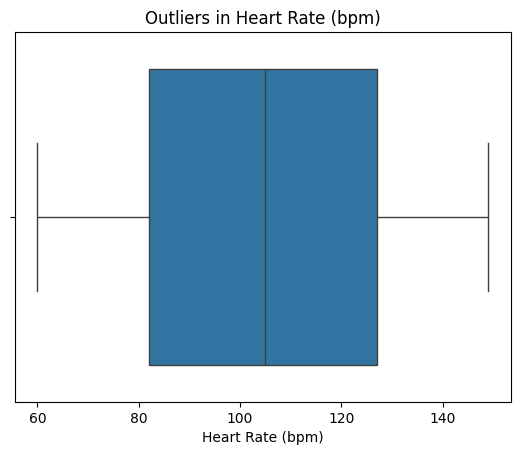

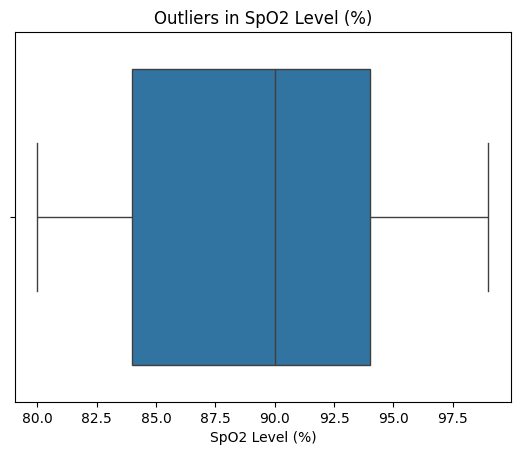

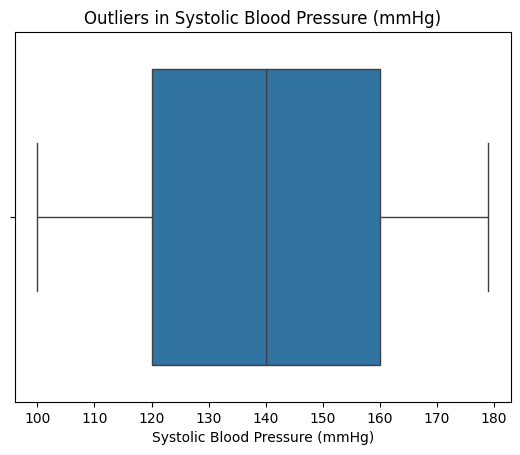

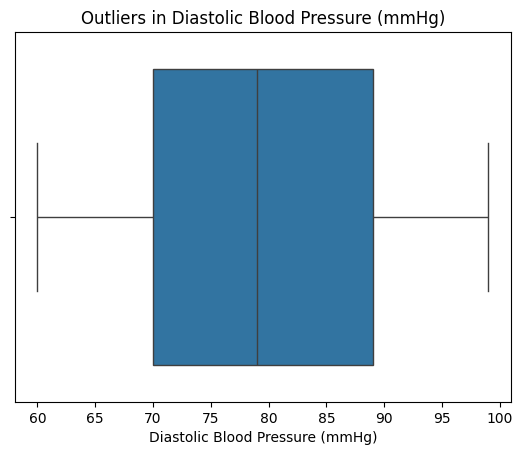

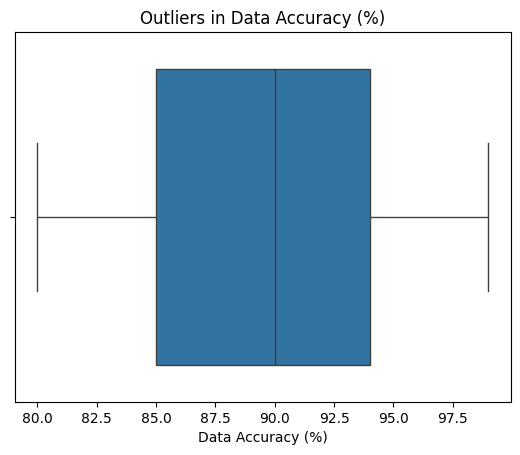

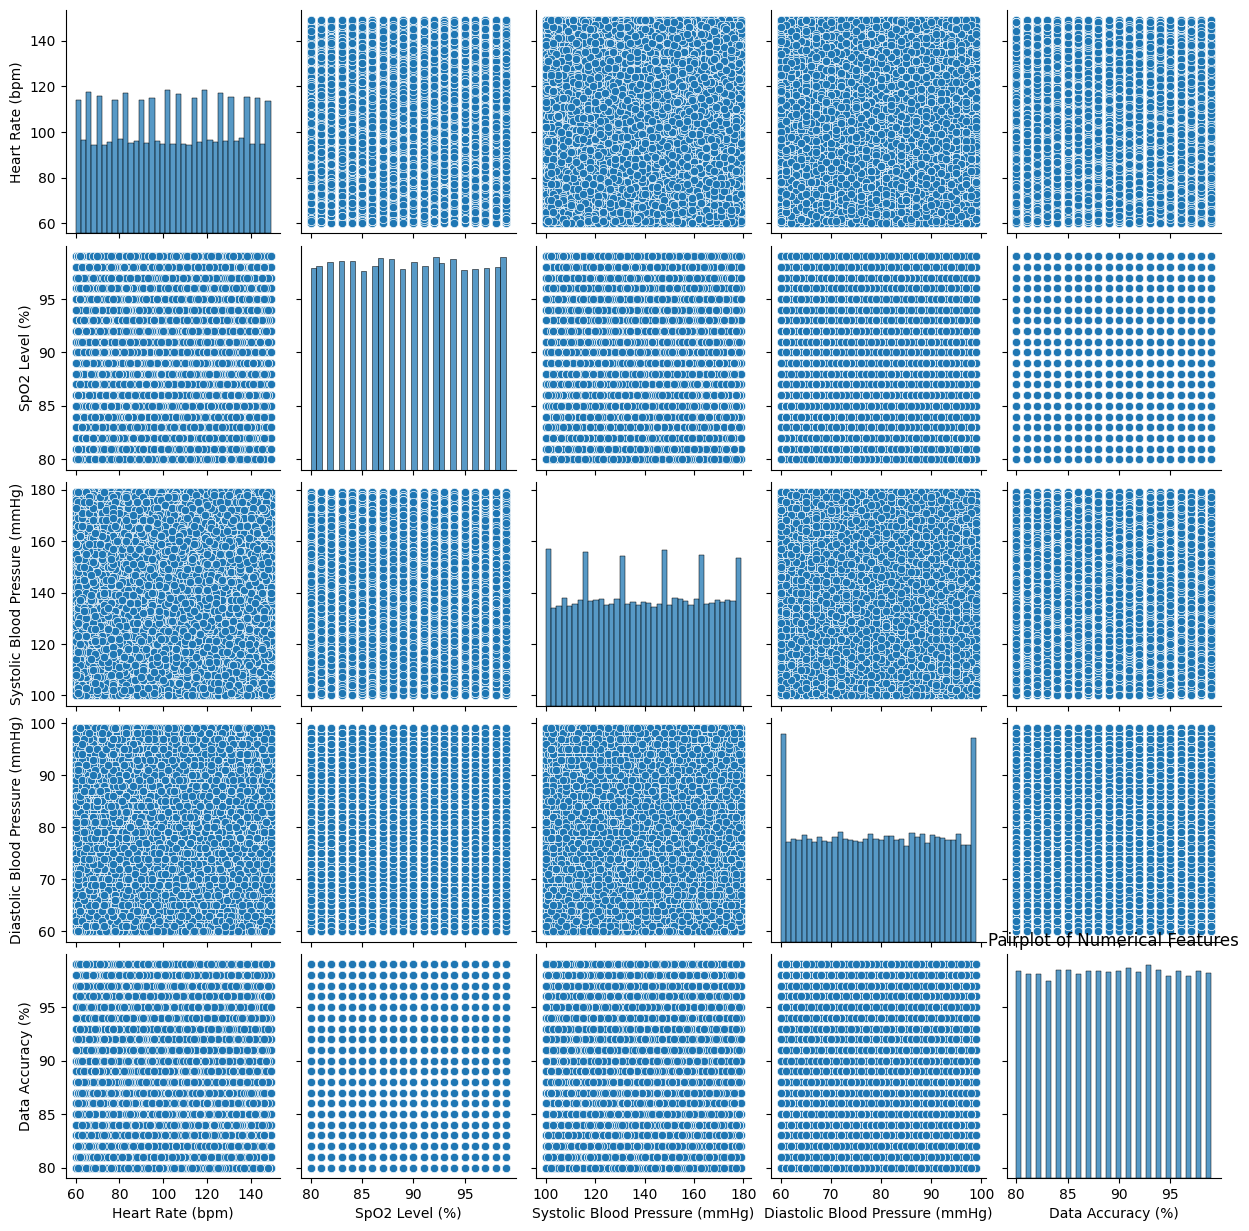

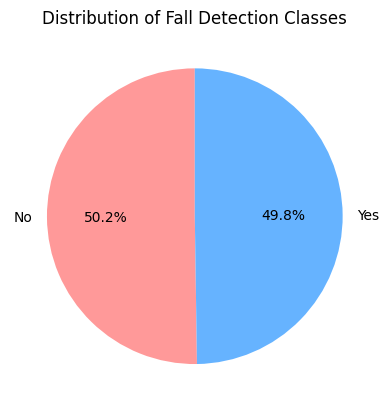

Class Counts for 'Fall Detection':
 Fall Detection
No     25117
Yes    24883
Name: count, dtype: int64


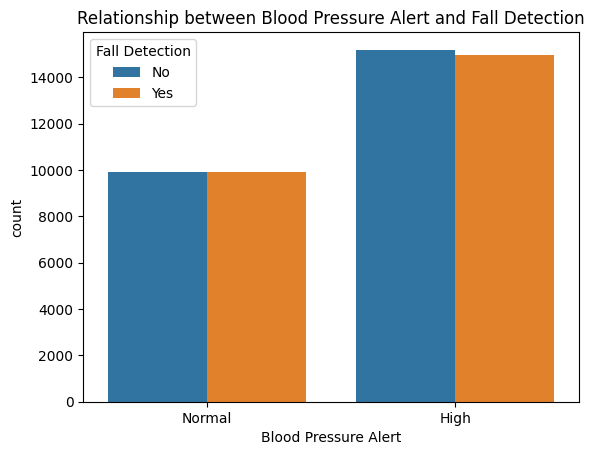

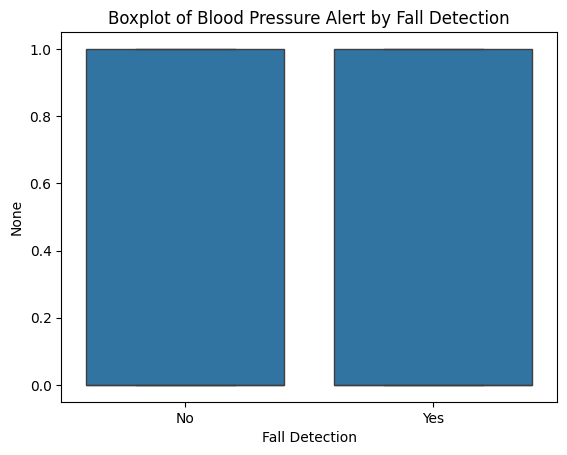

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
file_path = r"C:\Users\Asus\Desktop\CM1601 Viva\archive (2)\patients_data_with_alerts.xlsx"
df = pd.read_excel(file_path)

# Drop the 'Patient Number' column entirely
df = df.drop(columns=['Patient Number'], errors='ignore')

# Step 1.1: Identify Unwanted Columns
unwanted_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Unwanted Columns (only one unique value):", unwanted_columns)

# Step 1.2: Find Missing Values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Step 1.3: Find Features with One Value
single_value_features = [col for col in df.columns if df[col].nunique() == 1]
print("Features with only one value:", single_value_features)

# Step 1.4: Explore Categorical Features
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", categorical_features)

# Step 1.5: Categorical Feature Distribution
for cat_col in categorical_features:
    print(f"Distribution for {cat_col}:")
    print(df[cat_col].value_counts(normalize=True))

# Step 1.6: Relationship Between Categorical Features and Label (Assuming 'Fall Detection' is the label)
if 'Fall Detection' in df.columns:
    for cat_col in categorical_features:
        sns.countplot(x=cat_col, hue='Fall Detection', data=df)
        plt.title(f'Relationship between {cat_col} and Fall Detection')
        plt.xticks(rotation=45)
        plt.show()

# Step 1.7: Explore Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Remove 'Body Temperature (°C)' from the list of numerical features
numerical_features = numerical_features.drop('Body Temperature (°C)', errors='ignore')

print("Numerical Features:", numerical_features)

# Step 1.8: Find Discrete Numerical Features
discrete_features = [col for col in numerical_features if df[col].nunique() < 20]
print("Discrete Numerical Features:", discrete_features)

# Step 1.9: Relation Between Discrete Numerical Features and Labels
for feature in discrete_features:
    if 'Fall Detection' in df.columns:
        sns.countplot(x=feature, hue='Fall Detection', data=df)
        plt.title(f'Relationship between {feature} and Fall Detection')
        plt.show()

# Step 1.10: Find Continuous Numerical Features
continuous_features = [col for col in numerical_features if df[col].nunique() > 20]
print("Continuous Numerical Features:", continuous_features)

# Step 1.11: Distribution of Continuous Numerical Features
for feature in continuous_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Step 1.12: Relationship Between Continuous Numerical Features and Labels
for feature in continuous_features:
    if 'Fall Detection' in df.columns:
        sns.boxplot(x='Fall Detection', y=feature, data=df)
        plt.title(f'Relationship between {feature} and Fall Detection')
        plt.show()

# Step 1.13: Confusion Matrix to See How Each Feature Relates to Each Other
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 1.14: Find Outliers in Numerical Features
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

# Step 1.15: Explore the Correlation Between Numerical Features
sns.pairplot(df[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Step 1.16: Check if the Dataset is Balanced or Not (Assuming 'Fall Detection' is the label)
if 'Fall Detection' in df.columns:
    class_counts = df['Fall Detection'].value_counts()
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title('Distribution of Fall Detection Classes')
    plt.show()
    print("Class Counts for 'Fall Detection':\n", class_counts)

# Step 1.17: Relationship Between 'Blood Pressure Alert' and 'Fall Detection' (if present in the data)
if 'Blood Pressure Alert' in df.columns and 'Fall Detection' in df.columns:
    sns.countplot(x='Blood Pressure Alert', hue='Fall Detection', data=df)
    plt.title('Relationship between Blood Pressure Alert and Fall Detection')
    plt.show()

    sns.boxplot(x='Fall Detection', y=df['Blood Pressure Alert'].astype('category').cat.codes, data=df)
    plt.title('Boxplot of Blood Pressure Alert by Fall Detection')
    plt.show()